In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
df_weather = pd.read_csv("export-nice.csv", sep=",",  error_bad_lines=False, skiprows = 3)
df_moon = pd.read_csv("moon-phases-2009-2018-Europe_Monaco.csv", sep=",",  error_bad_lines=False)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
df_moon['date'] = pd.to_datetime(df_moon['date'])

In [3]:
df_weather.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,OPINION
0,2009-01-01,10,6,21,5,9,7,2.5,84,9.875,1024,23.75,10,6,4,113,113,113,météo défavorable
1,2009-01-02,11,4,14,2,10,4,0.0,72,10.000,1022,11.50,11,7,1,113,113,113,météo très défavorable
2,2009-01-03,7,5,23,2,7,5,0.0,73,10.000,1019,5.75,7,2,0,113,113,113,météo très défavorable


In [4]:
df_moon.head(3)

,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2009-01-04,12:56 PM,First Quarter,2,2009-01-04 12:56:00,1231070160,"January 4, 2009"
1,2009-01-11,04:27 AM,Full Moon,3,2009-01-11 04:27:00,1231644420,"January 11, 2009"
2,2009-01-18,03:46 AM,Last Quarter,4,2009-01-18 03:46:00,1232246760,"January 18, 2009"


In [5]:
df_moon.dtypes

date            datetime64[ns]
time                    object
phase                   object
phaseid                  int64
datetime                object
timestamp                int64
friendlydate            object
dtype: object

In [6]:
df_weather.dtypes

DATE                      datetime64[ns]
MAX_TEMPERATURE_C                  int64
MIN_TEMPERATURE_C                  int64
WINDSPEED_MAX_KMH                  int64
TEMPERATURE_MORNING_C              int64
TEMPERATURE_NOON_C                 int64
TEMPERATURE_EVENING_C              int64
PRECIP_TOTAL_DAY_MM              float64
HUMIDITY_MAX_PERCENT               int64
VISIBILITY_AVG_KM                float64
PRESSURE_MAX_MB                    int64
CLOUDCOVER_AVG_PERCENT           float64
HEATINDEX_MAX_C                    int64
DEWPOINT_MAX_C                     int64
WINDTEMP_MAX_C                     int64
WEATHER_CODE_MORNING               int64
WEATHER_CODE_NOON                  int64
WEATHER_CODE_EVENING               int64
OPINION                           object
dtype: object

In [7]:
df = pd.DataFrame(df_moon['date'])
df['phaseid'] = df_moon['phaseid']
df['phase'] = df_moon['phase']

In [8]:
df['Precipitation'] = 0

In [9]:
df.head(3)

,date,phaseid,phase,Precipitation
0,2009-01-04,2,First Quarter,0
1,2009-01-11,3,Full Moon,0
2,2009-01-18,4,Last Quarter,0


In [10]:
df_weather.loc[df_weather['DATE'] == "2009-01-01", ['OPINION']]

,OPINION
0,météo défavorable


In [11]:
opinion = np.array([])
precipitation = np.array([])
coverage = np.array([])
for i in df['date']:
    opinion = np.append(opinion, df_weather.loc[df_weather['DATE'] == i, ['OPINION']])
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
len(opinion)

495

In [12]:
df['OPINION'] = opinion
df['Precipitation'] = precipitation
df['Coverage'] = coverage

In [13]:
df.head()

,date,phaseid,phase,Precipitation,OPINION,Coverage
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.000
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.750
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.500
3,2009-01-26,1,New Moon,32.7,météo très défavorable,64.125
4,2009-02-03,2,First Quarter,2.2,météo défavorable,44.250


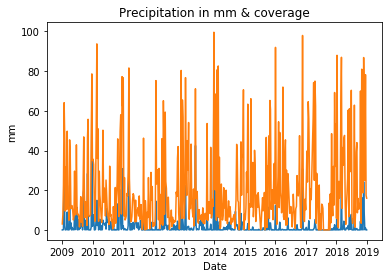

In [14]:
plt.plot(df['date'], df['Precipitation'])
plt.plot(df['date'], df['Coverage'])
plt.title('Precipitation in mm & coverage')
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()

In [15]:
np.average(df['Precipitation'])

2.656161616161616

In [16]:
np.average(df.loc[df['phaseid'] == i, ['Precipitation']])

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [17]:
np.std(df.loc[df['phaseid'] == i, ['Precipitation']])

Precipitation   NaN
dtype: float64

In [18]:
for i in range(1,5):
    a = np.array(df.loc[df['phaseid'] == i, ['Precipitation']])
    b = np.array(df.loc[df['phaseid'] == i, ['Coverage']])
    print("Phase {} average = {} mm, standard deviation = {}".format(i, 
                        np.average(a), np.std(a)))
    print("Coverage = {} %".format( 
                        np.average(b)))


Phase 1 average = 1.9853658536585368 mm, standard deviation = 4.897347596815778
Coverage = 19.395664227642275 %
Phase 2 average = 3.0564516129032264 mm, standard deviation = 8.886917186874669
Coverage = 20.101814516129032 %
Phase 3 average = 2.7201612903225807 mm, standard deviation = 8.280427562580734
Coverage = 21.405241935483872 %
Phase 4 average = 2.857258064516129 mm, standard deviation = 8.05892786220608
Coverage = 22.090725806451612 %


In [19]:
np.std(df['Precipitation'])

7.704048352936619

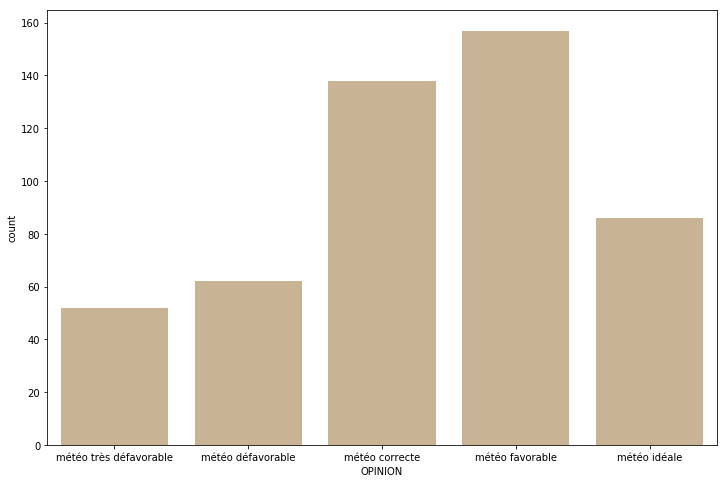

In [20]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches( 12, 8)
sns.countplot(df['OPINION'], color='tan')

In [21]:
df.loc[df['OPINION'] == "météo favorable"].head(5)

,date,phaseid,phase,Precipitation,OPINION,Coverage
10,2009-03-18,4,Last Quarter,0.1,météo favorable,11.625
16,2009-05-01,2,First Quarter,1.3,météo favorable,12.250
17,2009-05-09,3,Full Moon,0.1,météo favorable,9.500
18,2009-05-17,4,Last Quarter,0.6,météo favorable,5.000
21,2009-06-07,3,Full Moon,0.3,météo favorable,7.625


In [22]:
phase = [0, 'New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo favorable')
    print('Bonne météo #{} phase {} {}, precipitation = {}'.format(b, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo favorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo favorable")]),2 )))
print('--------------------------------------------------')
phase = [0, 'New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    c = np.count_nonzero(a == 'météo idéale')
    #d = np.mean(df.loc[df['phaseid'] == i, ['precipitation']])
    print('Très Bonne météo #{} phase {} {}, precipitation = {}'.format(c, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo idéale")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo idéale")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo correcte')
    print('Météo correcte #{} phase {} {}, precipitation = {}'.format(b, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo correcte")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo correcte")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo défavorable')
    print('Mauvaise météo #{} phase {} {}, precipitation = {}'.format(b , i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) 
                                                         & (df['OPINION'] == "météo défavorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo défavorable")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    c = np.count_nonzero(a == 'météo très défavorable')
    print('Très Mauvaise météo #{} phase {} {}, precipitation = {}'.format(c, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) 
                                                         & (df['OPINION'] == "météo très défavorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo très défavorable")]),2 )))


Bonne météo #44 phase 1 New Moon, precipitation = 1.12
Coverage = 12.06
Bonne météo #43 phase 2 First Quarter, precipitation = 0.78
Coverage = 12.37
Bonne météo #33 phase 3 Full Moon, precipitation = 0.94
Coverage = 14.68
Bonne météo #37 phase 4 Last Quarter, precipitation = 1.23
Coverage = 11.46
--------------------------------------------------
Très Bonne météo #19 phase 1 New Moon, precipitation = 0.19
Coverage = 8.13
Très Bonne météo #21 phase 2 First Quarter, precipitation = 0.26
Coverage = 6.41
Très Bonne météo #25 phase 3 Full Moon, precipitation = 0.27
Coverage = 6.23
Très Bonne météo #21 phase 4 Last Quarter, precipitation = 0.32
Coverage = 6.71
--------------------------------------------------
Météo correcte #34 phase 1 New Moon, precipitation = 1.14
Coverage = 19.8
Météo correcte #33 phase 2 First Quarter, precipitation = 2.23
Coverage = 19.88
Météo correcte #38 phase 3 Full Moon, precipitation = 1.41
Coverage = 23.62
Météo correcte #33 phase 4 Last Quarter, precipitation =

In [23]:
from datetime import datetime, timedelta
df['date + 1'] = df['date'] + timedelta(1)
df['date -1'] = df['date'] - timedelta(1)

In [24]:
df.head(3)

,date,phaseid,phase,Precipitation,OPINION,Coverage,date + 1,date -1
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.00,2009-01-05,2009-01-03
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.75,2009-01-12,2009-01-10
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.50,2009-01-19,2009-01-17


In [25]:
precipitation = np.array([])
coverage = np.array([])
for i in df['date -1']:
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
df['Precipitation - 1'] = precipitation
df['Coverage - 1'] = coverage
len(precipitation)

495

In [26]:
precipitation = np.array([])
coverage = np.array([])
for i in df['date + 1']:
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
df['Precipitation + 1'] = precipitation
df['Coverage + 1'] = coverage
len(precipitation)

495

In [27]:
df.head(3)

,date,phaseid,phase,Precipitation,OPINION,Coverage,date + 1,date -1,Precipitation - 1,Coverage - 1,Precipitation + 1,Coverage + 1
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.00,2009-01-05,2009-01-03,0.0,5.750,0.0,22.750
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.75,2009-01-12,2009-01-10,0.1,14.625,0.0,4.375
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.50,2009-01-19,2009-01-17,0.0,28.000,8.4,64.500


In [28]:
df['Mean Cov'] = (df['Coverage - 1'] + df['Coverage'] + df['Coverage + 1']) / 3
df['Mean Prec'] = (df['Precipitation - 1'] + df['Precipitation'] + df['Precipitation + 1']) / 3

In [29]:
for i in range(1,5):
    a = np.array(df.loc[df['phaseid'] == i, ['Mean Prec']])
    b = np.array(df.loc[df['phaseid'] == i, ['Mean Cov']])
    print("Phase {} average = {} mm, standard deviation = {}".format(i, 
                        round(np.average(a), 2), round(np.std(a), 2)))
    print("Coverage = {} %".format( 
                        round(np.average(b), 2)))
print('Mean Coverage {}'.format(round(np.mean(df['Coverage']),2)))
print('Std deviation {}'.format(round(np.std(df['Coverage']),2)))

Phase 1 average = 2.05 mm, standard deviation = 3.49
Coverage = 19.9 %
Phase 2 average = 2.69 mm, standard deviation = 5.25
Coverage = 20.74 %
Phase 3 average = 2.31 mm, standard deviation = 4.64
Coverage = 20.04 %
Phase 4 average = 3.14 mm, standard deviation = 6.62
Coverage = 21.35 %
Mean Coverage 20.75
Std deviation 21.26


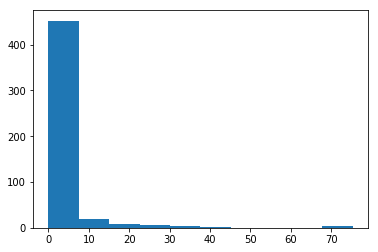

In [30]:
plt.hist(df['Precipitation'])
plt.show()

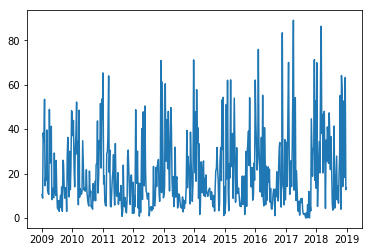

In [31]:
plt.plot(df['date'], df['Mean Cov'])
plt.show()

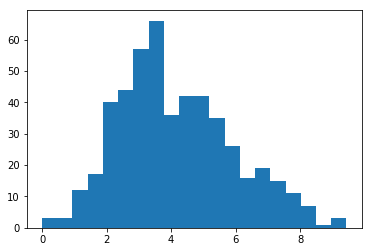

In [34]:
plt.hist(np.sqrt(df['Mean Cov']), bins=20)
plt.show()

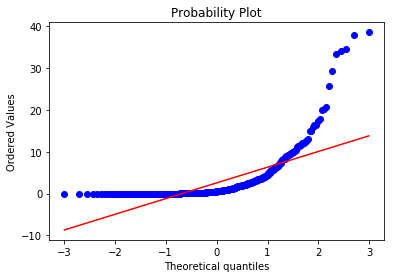

In [35]:
stats.probplot(df['Mean Prec'], dist="norm", plot=pylab)
pylab.show()

In [286]:
#PRECIPITATION IS NOTA GOOD INDICATOR, USE COVERAGE INSTEAD

In [ ]:
#Probabilities for weather

In [75]:
#Probability to get a weather "Très Favorable"
meteo = ['météo idéale', 'météo favorable', 'météo correcte', "météo défavorable", 'météo très défavorable']
totalCount = 0
probaWeather = []
for i in meteo:
    a = np.array(df_weather.loc[df_weather['OPINION'] == i]) 
    c = np.count_nonzero(a == i)
    print("Weather is ' {} ' count #{}, probability is: {}%.".format(i, c, round(c / len(df_weather), 2) * 100 ) )
    totalCount = totalCount + c
    probaWeather = probaWeather + [ round(c / len(df_weather), 2) * 100 ]
print(totalCount)
print(probaWeather)


Weather is ' météo idéale ' count #657, probability is: 18.0%.
Weather is ' météo favorable ' count #1191, probability is: 32.0%.
Weather is ' météo correcte ' count #1003, probability is: 27.0%.
Weather is ' météo défavorable ' count #461, probability is: 13.0%.
Weather is ' météo très défavorable ' count #371, probability is: 10.0%.
3683
[18.0, 32.0, 27.0, 13.0, 10.0]


In [81]:
probaWeather[0]

18.0

In [42]:
len(df_weather)

3683

In [108]:
totalCount = 0
phaseMoon = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']
phaseProba = []
for i in range(1, 5):
    iterVar = 0
    meteoProba = []
    for j in meteo:
        a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
        b = np.count_nonzero(a == j)
        print('phase {} {}, probability weather "{}" is {}% vs {}%("{}")'.format(i, phaseMoon[i-1], 
                                j, (round(b / (len(df)/4),2 ) * 100), probaWeather[iterVar], j))
        iterVar += 1
        meteoProba = meteoProba + [(round(b / (len(df)/4),2) * 100)]
    phaseProba = phaseProba +[meteoProba]
    print("-----------------------------------------------------------------------------------")
print(phaseProba)

phase 1 New Moon, probability weather "météo idéale" is 15.0% vs 18.0%("météo idéale")
phase 1 New Moon, probability weather "météo favorable" is 36.0% vs 32.0%("météo favorable")
phase 1 New Moon, probability weather "météo correcte" is 27.0% vs 27.0%("météo correcte")
phase 1 New Moon, probability weather "météo défavorable" is 11.0% vs 13.0%("météo défavorable")
phase 1 New Moon, probability weather "météo très défavorable" is 11.0% vs 10.0%("météo très défavorable")
-----------------------------------------------------------------------------------
phase 2 First Quarter, probability weather "météo idéale" is 17.0% vs 18.0%("météo idéale")
phase 2 First Quarter, probability weather "météo favorable" is 35.0% vs 32.0%("météo favorable")
phase 2 First Quarter, probability weather "météo correcte" is 27.0% vs 27.0%("météo correcte")
phase 2 First Quarter, probability weather "météo défavorable" is 11.0% vs 13.0%("météo défavorable")
phase 2 First Quarter, probability weather "météo trè

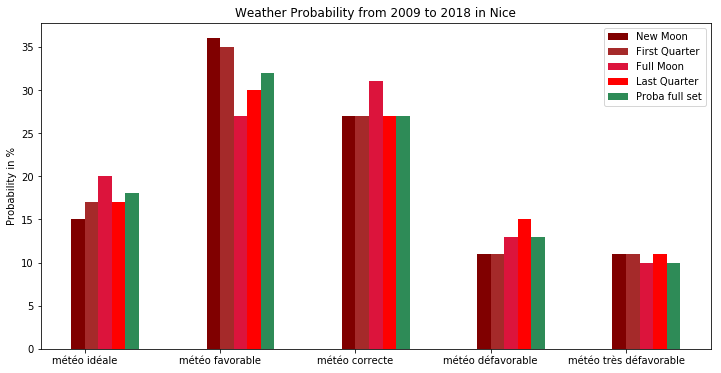

In [179]:
N = 5
ind = np.arange(N)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
width = 0.1
rects1 = ax.bar(ind, phaseProba[0], width,  color='maroon')
rects2 = ax.bar(ind + width, phaseProba[1], width,  color='brown')
rects3 = ax.bar(ind + 2 * width, phaseProba[2], width,  color='crimson')
rects4 = ax.bar(ind + 3 * width, phaseProba[3], width,  color='red')
rects5 = ax.bar(ind + 4 * width, probaWeather, width,  color='seagreen')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('météo idéale', 'météo favorable', 'météo correcte', "météo défavorable", 'météo très défavorable') )

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('New Moon', 'First Quarter', 'Full Moon', 'Last Quarter', 'Proba full set') )
ax.set_ylabel('Probability in %')
plt.title('Weather Probability from 2009 to 2018 in Nice')
plt.show()

In [83]:
#VERIFICATION NULL HYPTOTHESiS
#We want to know if p = p0

n = len(df)
print("Total population n = {}".format(n))

Total population n = 495


In [ ]:
#CLOUD COVERAGE

In [206]:
#AN ESTIMATOR
cloudEstimator = np.mean((df_weather['CLOUDCOVER_AVG_PERCENT']))
cloudEstimator = round(cloudEstimator,2)

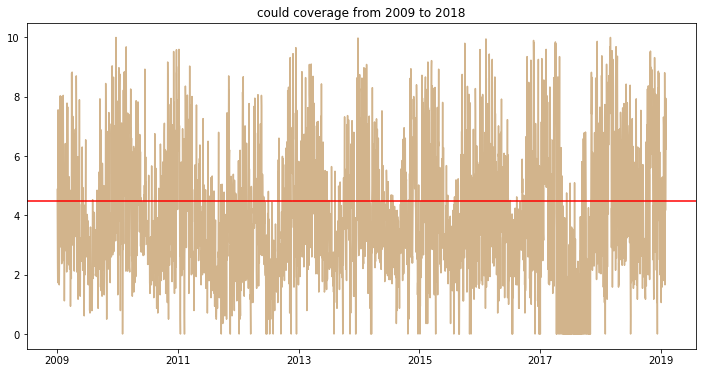

In [209]:
plt.figure(figsize = (12,6))
plt.plot(df_weather['DATE'], np.sqrt(df_weather['CLOUDCOVER_AVG_PERCENT']), color='tan')
plt.axhline(y=np.sqrt(cloudEstimator), color='r', linestyle='-')
plt.title('could coverage from 2009 to 2018')
plt.show()

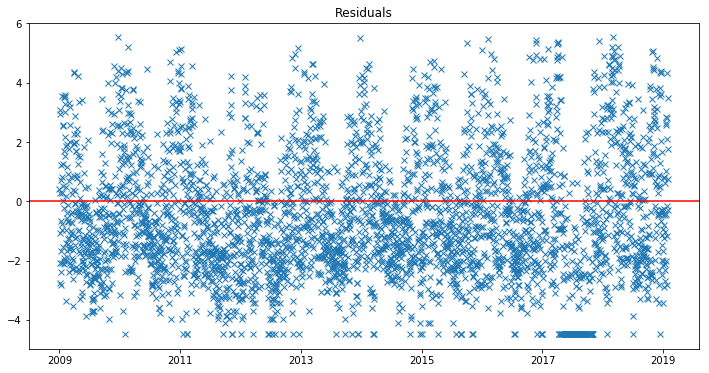

In [218]:
residuals = np.array(np.sqrt(df_weather['CLOUDCOVER_AVG_PERCENT']) - np.sqrt(cloudEstimator))
residuals
plt.figure(figsize = (12,6))
plt.plot(df_weather['DATE'], residuals, marker='x', linestyle = 'None')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals')
plt.show()

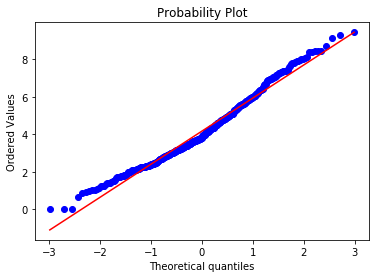

In [33]:
import pylab 
import scipy.stats as stats

stats.probplot(np.sqrt(df['Mean Cov']), dist="norm", plot=pylab) #sqrt to obtain a linear qqplot
pylab.show()

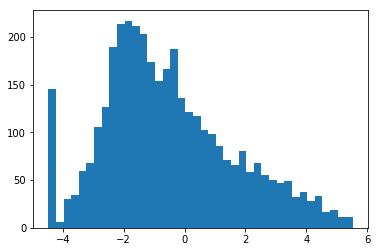

In [224]:
plt.hist(residuals, bins=40)
plt.show()

In [ ]:
#FISHER TEST

In [259]:
import scipy.stats as stats
a = np.array(np.sqrt(df_weather['CLOUDCOVER_AVG_PERCENT']))
b = np.array(np.sqrt(df['Coverage'])) #for all phases
import scipy.stats as stats

stats.f_oneway(a,b)


F_onewayResult(statistic=0.3090738868097083, pvalue=0.5782788261565721)

In [285]:
stats.f_oneway(a,b).pvalue

0.5782788261565721

L'hypothèse nulle H0 est l'égalité des moyennes des populations dont sont extraits les échantillons : m1=m2=m3=...=mk

In [288]:
for i in range(1,5):
    phase = np.sqrt(df['Coverage'].loc[df['phaseid'] == i])
    np.array(phase)
    statFisher = stats.f_oneway(a,phase)
    print('--------------------------------------------------------------------')
    print('Fisher-test les populations sont elles identiques ? hypothèse H0 :')
    print('Pour phase {} {}, p-value = {} > alpha= 0.05, H0 conservé donc les distributions ont la même variance et comparables.'.format(i, 
                phaseMoon[i-1], round(statFisher.pvalue,2)))
    

--------------------------------------------------------------------
Fisher-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 1 New Moon, p-value = 0.93 > alpha= 0.05, H0 conservé donc les distributions ont la même variance et comparables.
--------------------------------------------------------------------
Fisher-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 2 First Quarter, p-value = 0.69 > alpha= 0.05, H0 conservé donc les distributions ont la même variance et comparables.
--------------------------------------------------------------------
Fisher-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 3 Full Moon, p-value = 0.27 > alpha= 0.05, H0 conservé donc les distributions ont la même variance et comparables.
--------------------------------------------------------------------
Fisher-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 4 Last Quarter, p-value = 0.58 > alpha= 0.05, H0 conservé donc l

In [276]:
#LES MOYENNES SONT ELLES EGALES alpha = 0.95

F_onewayResult(statistic=0.007333503159804233, pvalue=0.9317603854694959)

In [291]:
for i in range(1,5):
    phase = np.sqrt(df['Coverage'].loc[df['phaseid'] == i])
    np.array(phase)
    statStudent = stats.ttest_ind(a,phase)
    print('--------------------------------------------------------------------')
    print('Student-test les populations sont elles identiques ? hypothèse H0 :')
    print('Pour phase {} {}, p-value = {} > alpha= 0.05, H0 conservé donc les moyennes ont la même variance et comparables.'.format(i, 
                phaseMoon[i-1], round(statStudent.pvalue,2)))

--------------------------------------------------------------------
Student-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 1 New Moon, p-value = 0.93 > alpha= 0.05, H0 conservé donc les moyennes ont la même variance et comparables.
--------------------------------------------------------------------
Student-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 2 First Quarter, p-value = 0.69 > alpha= 0.05, H0 conservé donc les moyennes ont la même variance et comparables.
--------------------------------------------------------------------
Student-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 3 Full Moon, p-value = 0.27 > alpha= 0.05, H0 conservé donc les moyennes ont la même variance et comparables.
--------------------------------------------------------------------
Student-test les populations sont elles identiques ? hypothèse H0 :
Pour phase 4 Last Quarter, p-value = 0.58 > alpha= 0.05, H0 conservé donc les moyennes

In [292]:
statStudent.pvalue

0.5767728142151964